In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
heart_dis = pd.read_csv("heart.csv")

In [153]:
heart_dis.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [154]:
heart_dis.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [155]:
heart_dis['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [156]:
heart_dis.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [157]:
correlation = heart_dis.corr()

In [158]:
correlation['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

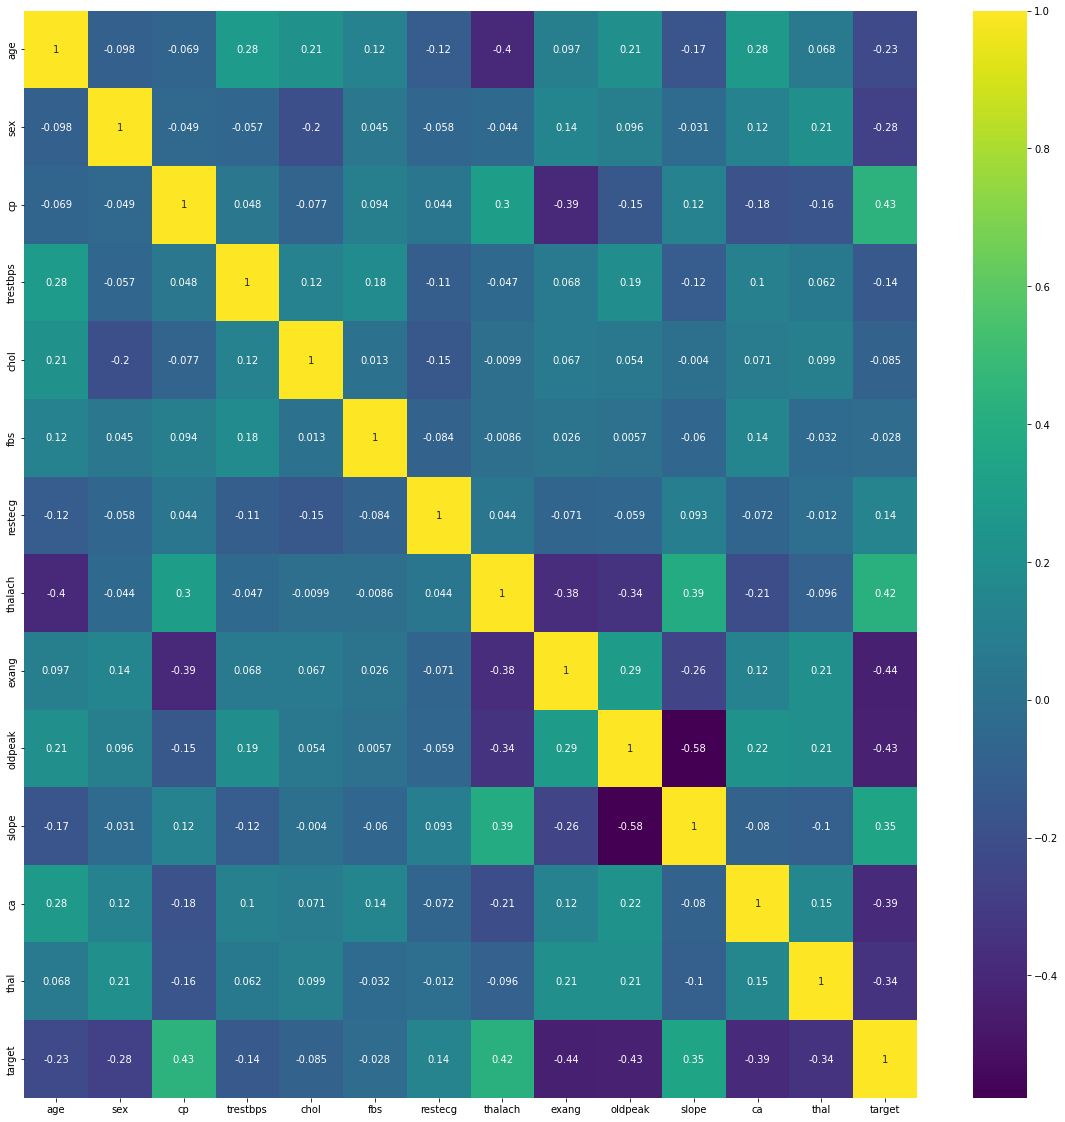

In [159]:
corr_matrix = heart_dis.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(20,20))
HD = sns.heatmap(heart_dis[top_corr_features].corr(), annot=True, cmap='viridis')

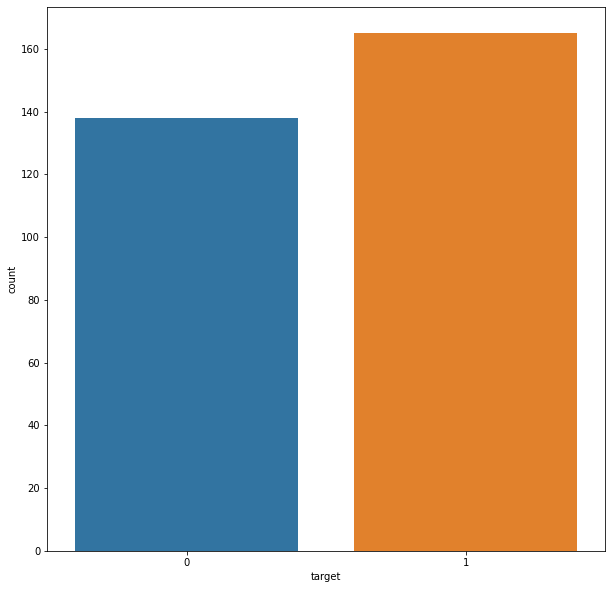

In [160]:
df, k = plt.subplots(figsize=(10, 10))
k = sns.countplot(x="target", data=heart_dis)
plt.show()

LOGISTIC REGRESSION

In [161]:
X = heart_dis.drop(['slope', 'ca', 'thal','target'], axis = 1)
y = heart_dis['target']

In [162]:
X.shape


(303, 10)

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Shape training set: X:{}, y:{}'.format(X_train.shape, y_train.shape))
print('Shape test set: X:{}, y:{}'.format(X_test.shape, y_test.shape))


Shape training set: X:(212, 10), y:(212,)
Shape test set: X:(91, 10), y:(91,)


In [164]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [165]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pred_data = classifier.predict(X_test)
accuracy = accuracy_score(y_test,pred_data)
print(accuracy)

0.8351648351648352


In [166]:
clf_report = classification_report(y_test, pred_data)
print('Classification report')
print("_____________________")
print(clf_report)
print("_____________________")

Classification report
_____________________
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91

_____________________


RANDOM FOREST CLASSIFIER

In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [168]:
randomforest_classifier= RandomForestClassifier(n_estimators=6)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [169]:
score.mean()

0.7427956989247312

In [170]:
from sklearn.neighbors import KNeighborsClassifier
k_classifier= KNeighborsClassifier(n_neighbors=5)
k_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [171]:
pred_d = k_classifier.predict(X_test)
accuracy = accuracy_score(y_test,pred_d)
print(accuracy)

0.6593406593406593


In [172]:
clf_rep = classification_report(y_test, pred_d)
print('Classification report')
print("_____________________")
print(clf_rep)
print("_____________________")

Classification report
_____________________
              precision    recall  f1-score   support

           0       0.63      0.59      0.61        41
           1       0.68      0.72      0.70        50

    accuracy                           0.66        91
   macro avg       0.66      0.65      0.65        91
weighted avg       0.66      0.66      0.66        91

_____________________


In [173]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel='linear', random_state=0)
classifier_svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [174]:
pred_test_ = classifier_svc.predict(X_test)
SVM_accuracy = accuracy_score(y_test,pred_test_)
print(SVM_accuracy)

0.8351648351648352


In [175]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier()
classifier1.fit(X_train,y_train)

DecisionTreeClassifier()

In [176]:
pred_test_data1 = classifier1.predict(X_test)
accuracy = accuracy_score(y_test,pred_test_data1)
print(accuracy)

0.7802197802197802


In [177]:
data_input = (41,0,1,130,204,0,0,172,0,1.4)
data_to_numpy= np.asarray(data_input)
reshaped_data = data_to_numpy.reshape(1,-1)
prediction = classifier.predict(reshaped_data)

if (prediction[0]== 0):
  print('According to the given details person does not have a Heart Disease')
else:
  print('According to the given details person has Heart Disease')

According to the given details person has Heart Disease


In [178]:
import pickle
pickle.dump(classifier, open('heart_dis.pkl', 'wb'))